# Dependencias

In [317]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 250

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set_style('whitegrid')

from scipy import optimize
from platypus import NSGAII, Problem, Real
import random

----

## Problema Original

$$B_1(X_1)= 6X_1-X_1^2  \qquad \rightarrow \qquad X_1^{opt}=3 \qquad \rightarrow \qquad B_1^{max}=B_1{X_1^{opt}}=9$$
$$B_2(X_2)=7X_2-1.5X_2^2  \qquad \rightarrow \qquad X_2^{opt}=7/3 \qquad \rightarrow \qquad B_2^{max}=B_2(X_2^{opt})=147/18$$
$$B_3(X_3)=8X_3-0.5X_3^2  \qquad \rightarrow \qquad X_3^{opt}=8 \qquad \rightarrow \qquad B_3^{max}=B_3(X)_3^{opt})=32$$


Representación mediante el **Método de los Pesos:**

$$\text{max} \quad Z=W_1(6X_1-X_1^2 )+W_2(7X_2-1.5X_2^2)+W_3(8X_3-0.5X_3^2)$$
$$\text{s.a.} \quad X_1+X_2+X_3=6 $$

## Veamos las funciones

In [286]:
def B1(x):
    return 6*x - x**2
def B2(x):
    return 7*x - 1.5*x**2
def B3(x):
    return 8*x - 0.5*x**2

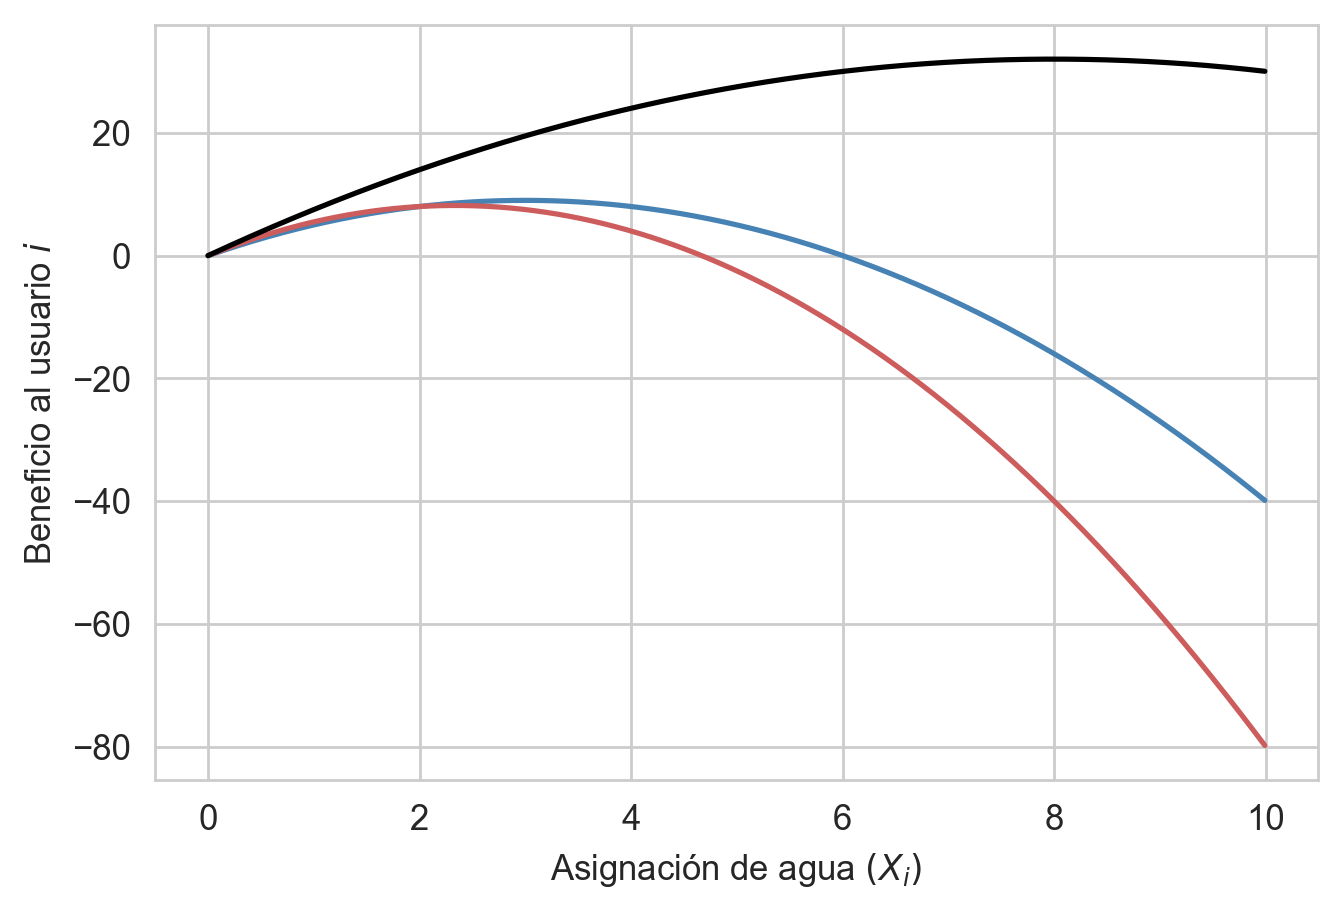

In [287]:
xx = np.arange(0,10,0.01)
plt.plot(xx,B1(xx), color='steelblue')
plt.plot(xx,B2(xx), color='indianred')
plt.plot(xx,B3(xx), color='black')
plt.ylabel('Beneficio al usuario $i$')
plt.xlabel('Asignación de agua $(X_i)$')
plt.show()

In [ ]:
Pymoo, Platypus, SciPy, 
Borg-MOEA, SpotPy, DREAM, 

In [288]:
# Vamos a hacer uso de la librería Platypus:
# Generamos el objeto "problema", definiendo numero de variables de decisión, objetivos, y restricciones respectivamente:
problem = Problem(3, 3, 1)

# Definimos la dirección de la Función Objetivo:
problem.directions[:] = Problem.MAXIMIZE

# Tipos y limites de las variables de decisión:
problem.types[:] = [Real(0, 3), Real(0, 7/3), Real(0,8)]

# Definimos la restricción:
problem.constraints[:] = "<=0"

In [289]:
# Explicitamos la Función Objetivo:
def MOProblem(vars):
    x = vars[0]
    y = vars[1]
    z = vars[2]
    return [6*x - x*x, 7*y - 1.5*y*y, 8*z-0.5*z*z], [x + y + z - 6]

problem.function = MOProblem

In [290]:
# Resolvemos usando NSGAII:
algorithm = NSGAII(problem)
algorithm.run(10000)

In [291]:
# Lista con soluciones, las primeras son las variables de decisión, las segundas los objetivos evaluados
feasible_solutions = [s for s in algorithm.result if s.feasible]  
#nondominated_solutions = nondominated(algorithm.result)

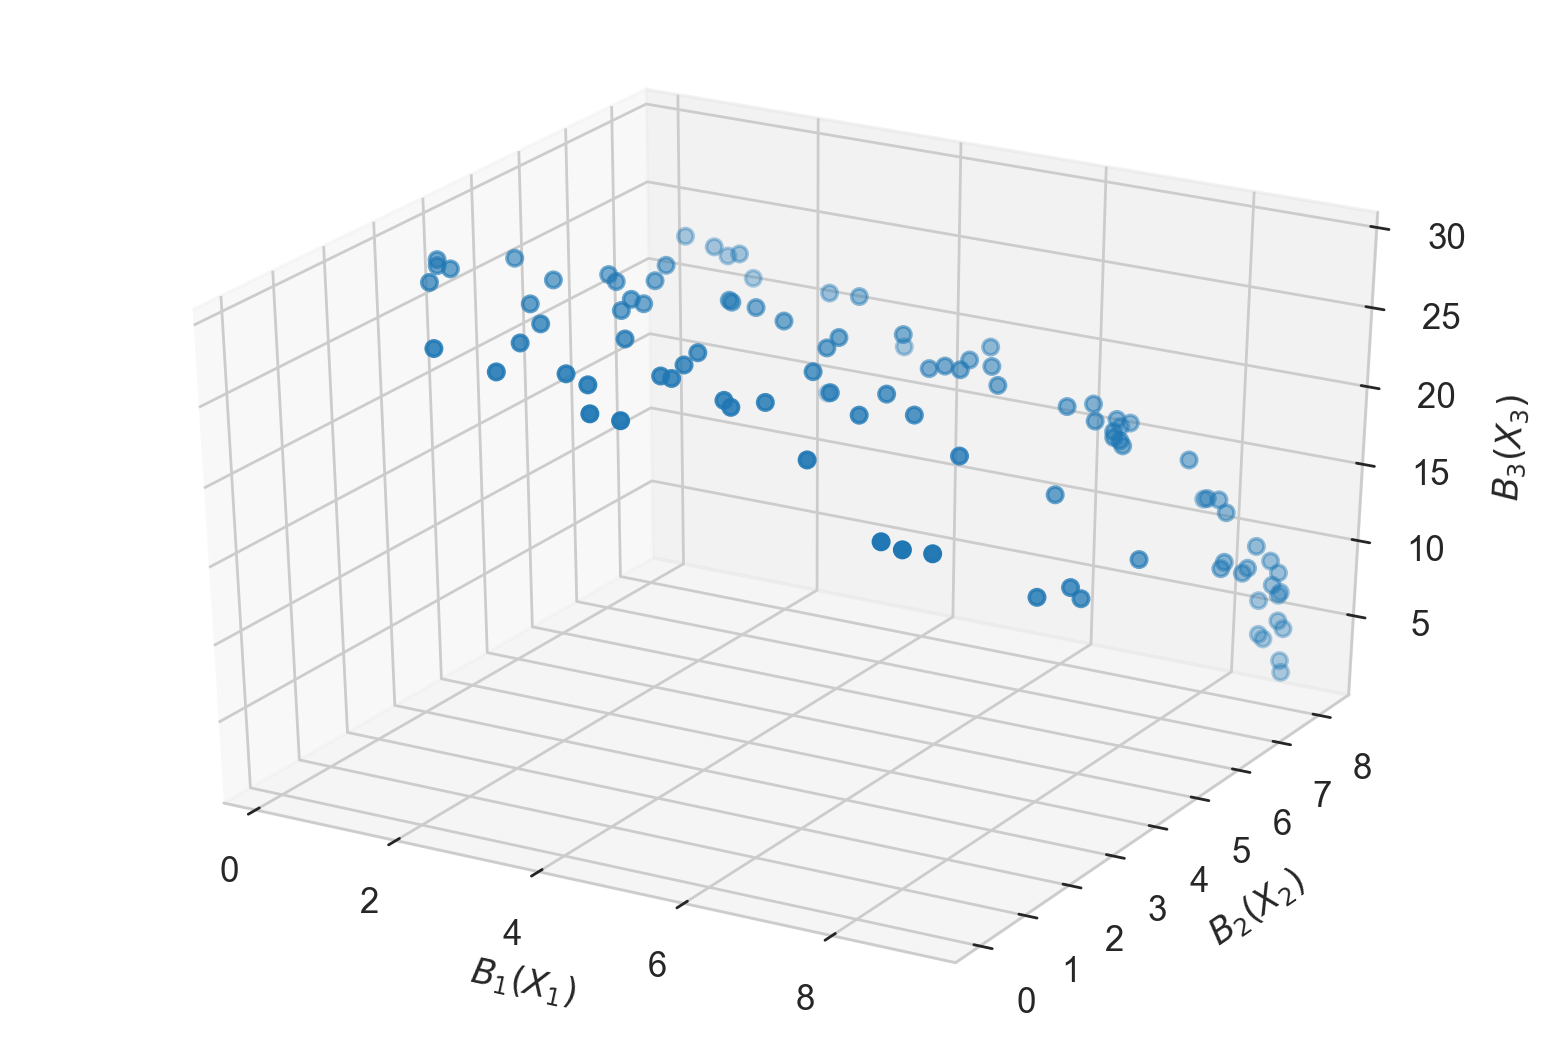

In [292]:
# Graficamos:
fig = plt.figure()
ax = Axes3D(fig)

# Extraemos los valores de las funciones objetivo:
sequence_containing_x_vals = [s.objectives[0] for s in feasible_solutions]
sequence_containing_y_vals = [s.objectives[1] for s in feasible_solutions]
sequence_containing_z_vals = [s.objectives[2] for s in feasible_solutions]

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
ax.set_xlabel('$B_1({X_1})$')
ax.set_ylabel('$B_2({X_2})$')
ax.set_zlabel('$B_3({X_3})$')
plt.show()

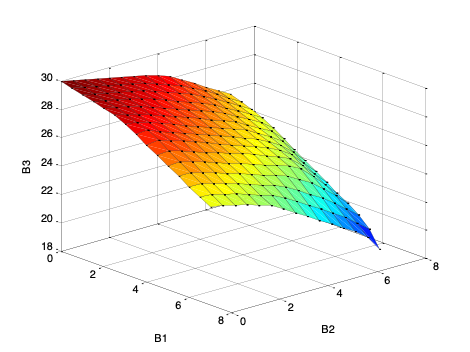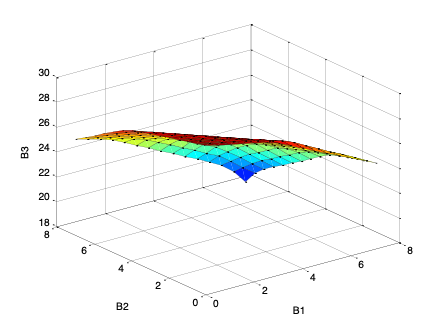

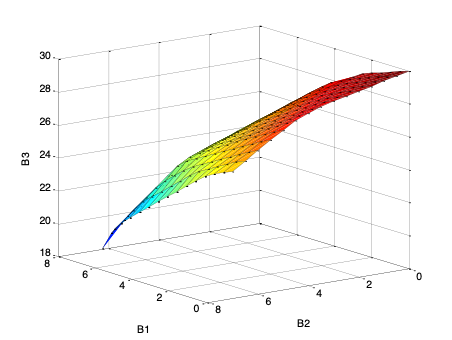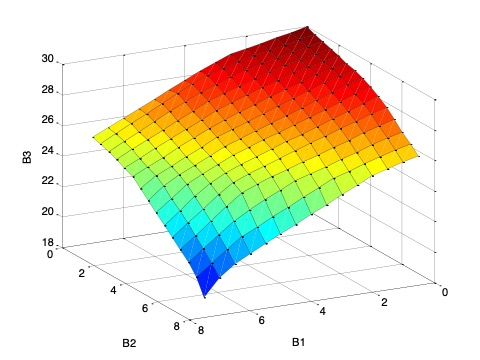

**Problema Original**: 
$$B_1(X_1)= 6X_1-X_1^2  \qquad \rightarrow \qquad X_1^{opt}=3 \qquad \rightarrow \qquad B_1^{max}=B_1{X_1^{opt}}=9$$
$$B_2(X_2)=7X_2-1.5X_2^2  \qquad \rightarrow \qquad X_2^{opt}=7/3 \qquad \rightarrow \qquad B_2^{max}=B_2(X_2^{opt})=147/18$$
$$B_3(X_3)=8X_3-0.5X_3^2  \qquad \rightarrow \qquad X_3^{opt}=8 \qquad \rightarrow \qquad B_3^{max}=B_3(X)_3^{opt})=32$$

Representación mediante el **Método de las Restricciones**:



$$\text{max} \quad B_1(X_1)=6X_1-X_1^2$$
$$\text{s.a.} \qquad B_2(X_2)=7X_2-1.5X_2^2 \geq L_2$$
$$B_3(X_3)=8X_3-0.5X_3^2 \geq L_3$$
$$X_1+X_2+X_3 \leq 6$$

In [154]:
# Vamos a hacer uso de la librería Platypus:
# Generamos el objeto "problema", definiendo numero de variables de decisión, objetivos, y restricciones respectivamente:
problem = Problem(3, 1, 3)

# Definimos la dirección de la Función Objetivo:
problem.directions[:] = Problem.MAXIMIZE

# Tipos y limites de las variables de decisión:
problem.types[:] = [Real(0, 3), Real(0, 7/3), Real(0,8)]

# Definimos la restricción:
problem.constraints[:] = "<=0"

In [155]:
# Explicitamos la Función Objetivo:
def MOProblem(vars):
    x = vars[0]
    y = vars[1]
    z = vars[2]
    return [6*x - x*x], [x + y + z - 6, L2 - (7*y - 1.5*y*y) , L3 - (8*z-0.5*z*z)]

problem.function = MOProblem

In [231]:
List2 = list(range(0,30,1))
List3 = list(range(0,30,1))

In [ ]:
# Resolvemos usando NSGAII:
x_keep, y_keep, z_keep, B1_keep = [], [], [] , []

for element2 in List2:
    L2 = element2
    print("L2",L2)
    for element3 in List3:
        L3 = element3
        print("L3",L3)
        algorithm = NSGAII(problem)
        algorithm.run(10000)
        feasible_solutions = [s for s in algorithm.result if s.feasible]
        try:
            x_keep.append(feasible_solutions[-1].variables[0])
            y_keep.append(feasible_solutions[-1].variables[1])
            z_keep.append(feasible_solutions[-1].variables[2])
            B1_keep.append(feasible_solutions[-1].objectives[0])
        except Exception as e:
            print("fail in L2=",L2, "and L3=", L3, " Due to:", e)
            pass

In [247]:
def f2(x):
    return 7*x - 1.5*x**2
def f3(x):
    return 8*x-0.5*x**2

B2_keep, B3_keep = [], []
for element in y_keep:
    B2_keep.append(f2(element))
for element in z_keep:
    B3_keep.append(f3(element))

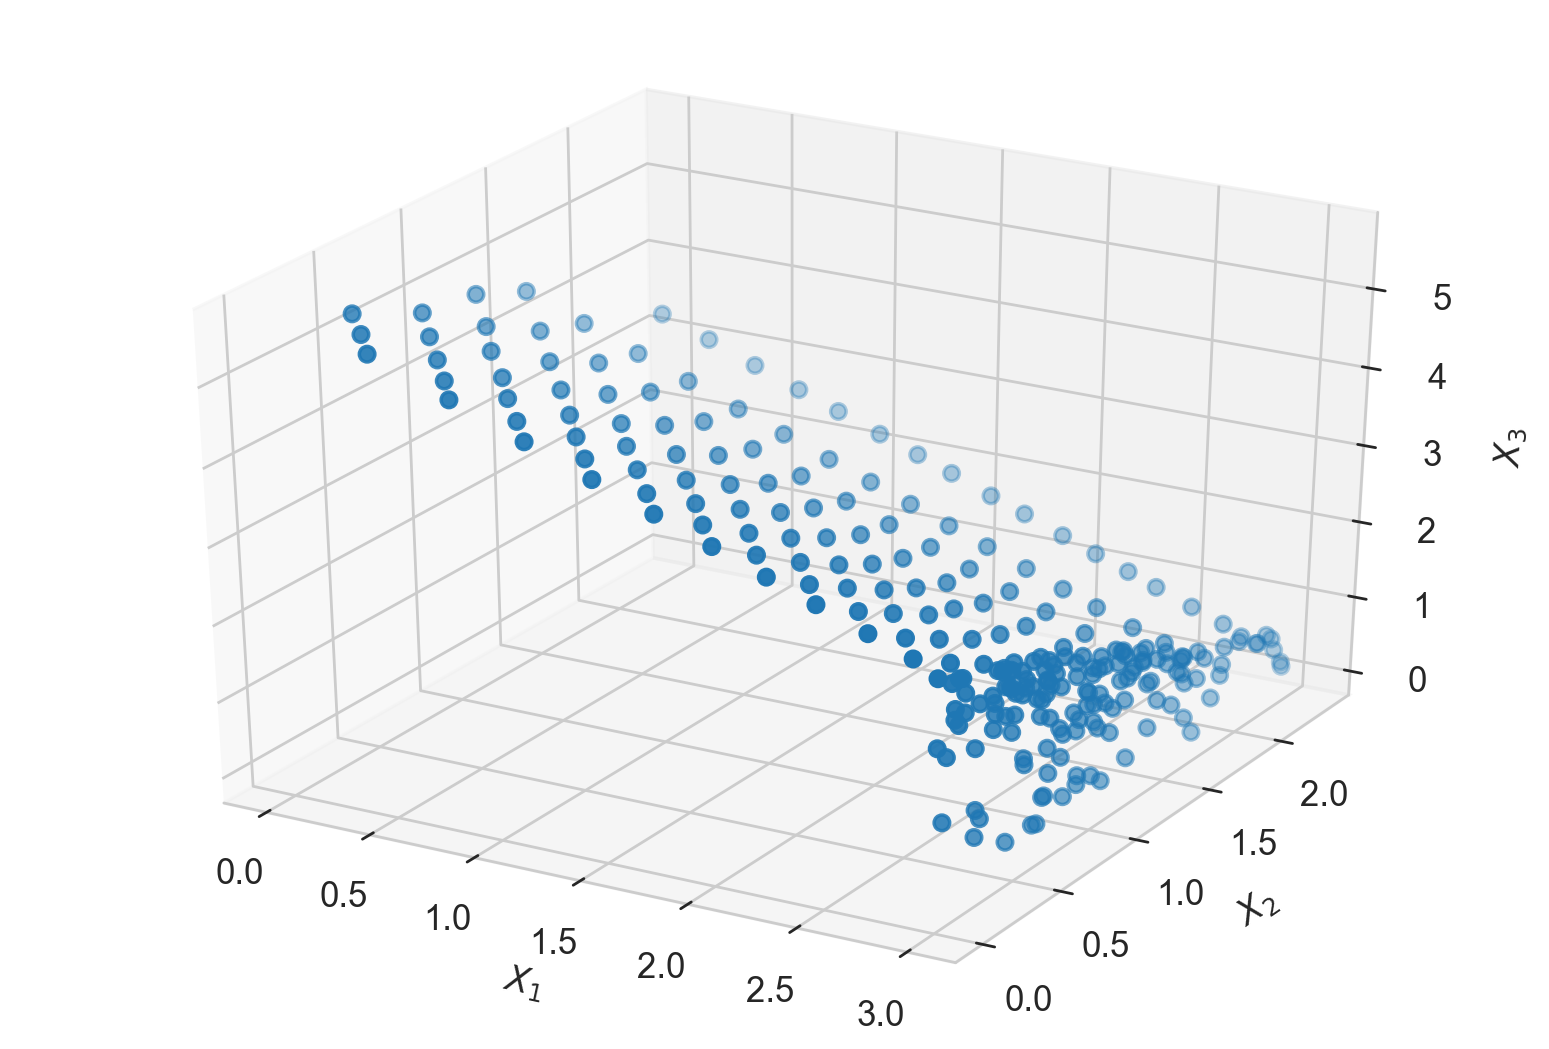

In [295]:
# Graficamos:
fig = plt.figure()
ax = Axes3D(fig)

# Extraemos los valores de las funciones objetivo:

ax.scatter(x_keep, y_keep, z_keep)
ax.set_xlabel('$X_1$')
ax.set_ylabel('$X_2$')
ax.set_zlabel('$X_3$')
plt.show()

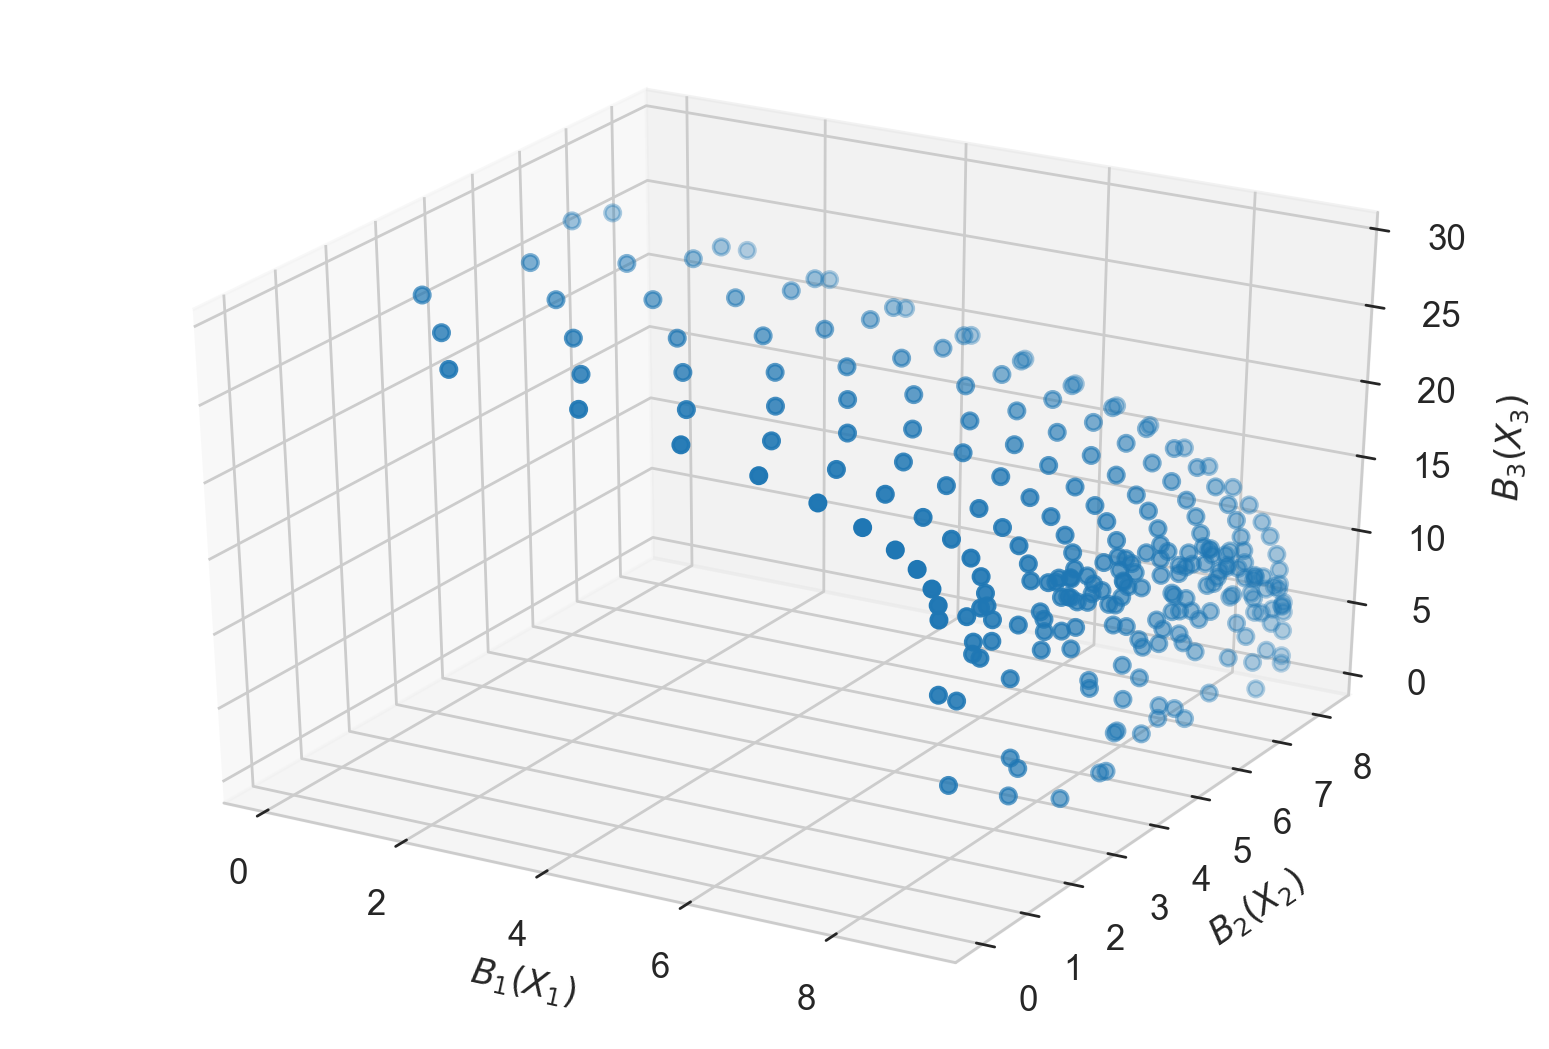

In [296]:
# Graficamos:
fig = plt.figure()
ax = Axes3D(fig)

# Extraemos los valores de las funciones objetivo:

ax.scatter(B1_keep, B2_keep, B3_keep)
ax.set_xlabel('$B_1({X_1})$')
ax.set_ylabel('$B_2({X_2})$')
ax.set_zlabel('$B_3({X_3})$')
plt.show()

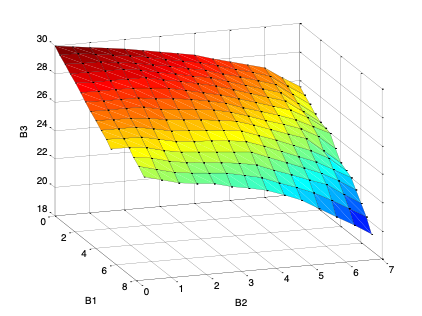!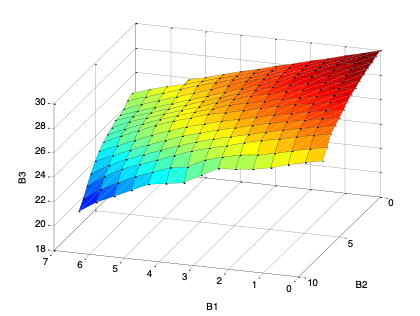

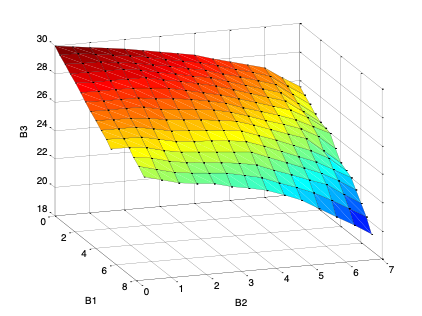!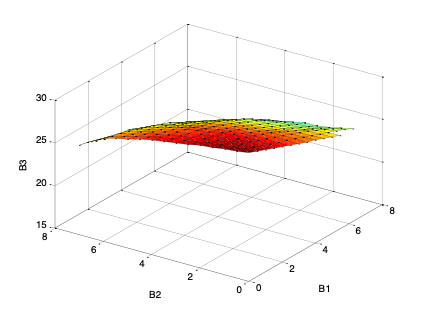

----

# Otro Ejemplo con SciPy: Dos Objetivos, sin restricciones.

$$\min f_1(\mathbf{x}), f2(\mathbf{x})$$  

$$f_1(\mathbf{x}) = x^4 - 10x^2+xy + y^4 -x^2y^2$$

$$ f_2(\mathbf{x}) = y^4 - x^2y^2 + x^4 + xy $$

## Revisando las Funciones

In [309]:
def f1(x):
    return x[0]**4 - 10*(x[0]**2) + x[0]*x[1] + x[1]**4 -(x[0]**2)*(x[1]**2)

def f2(x):
    return x[1]**4 - (x[0]**2)*(x[1]**2) + x[0]**4 + x[0]*x[1]

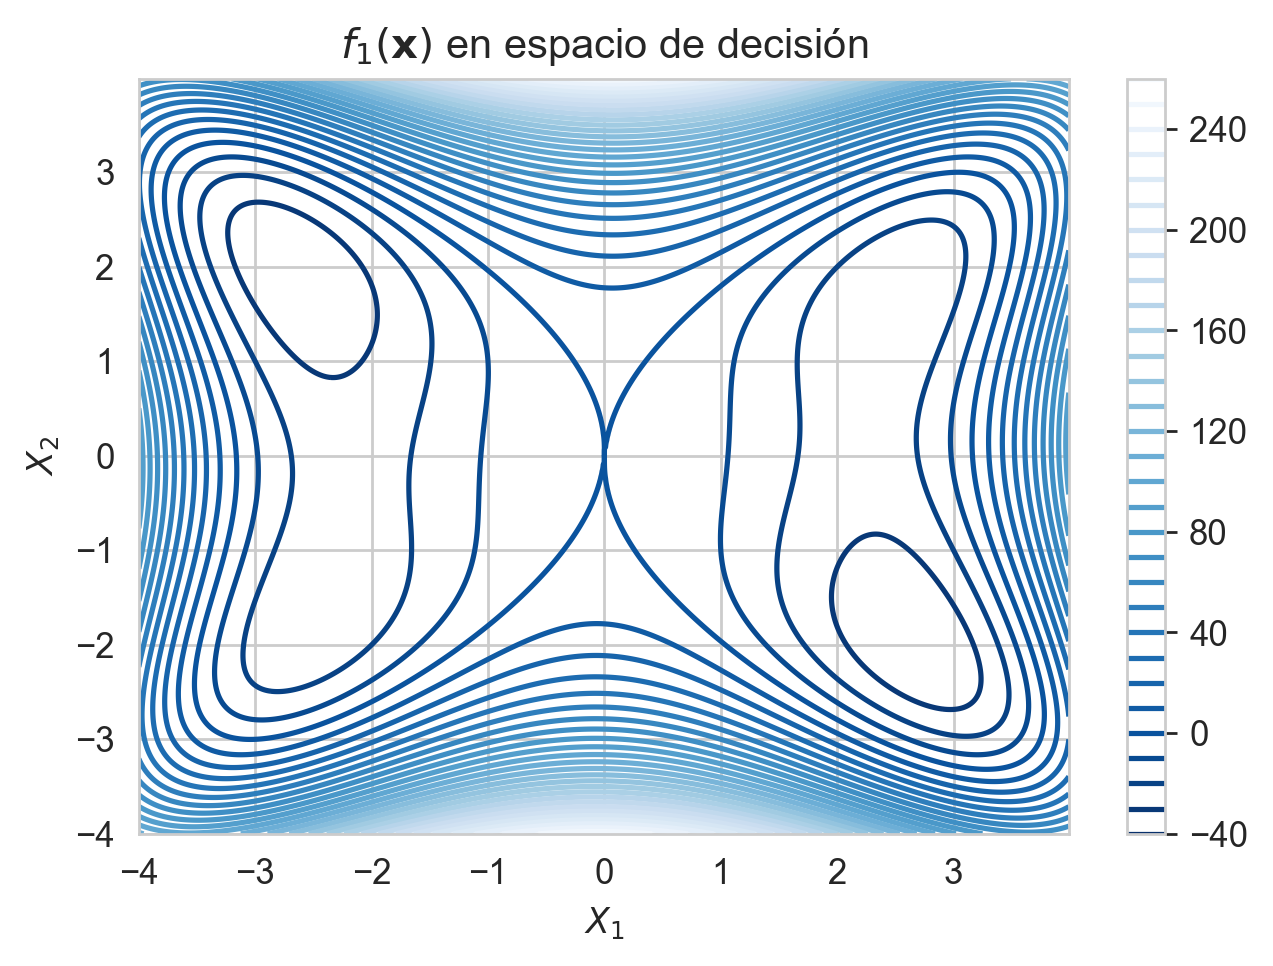

In [311]:
# Graficamos en azul las curvas de nivel de "f1":

X1,X2 = np.meshgrid(np.arange(-4,4,0.01), np.arange(-4,4,0.01))

plt.contour(X1,X2,f1([X1,X2]),30,cmap=plt.cm.Blues_r)

plt.title('$f_1(\mathbf{x})$ en espacio de decisión')
plt.ylabel('$X_2$')
plt.xlabel('$X_1$')
plt.colorbar()
plt.show()

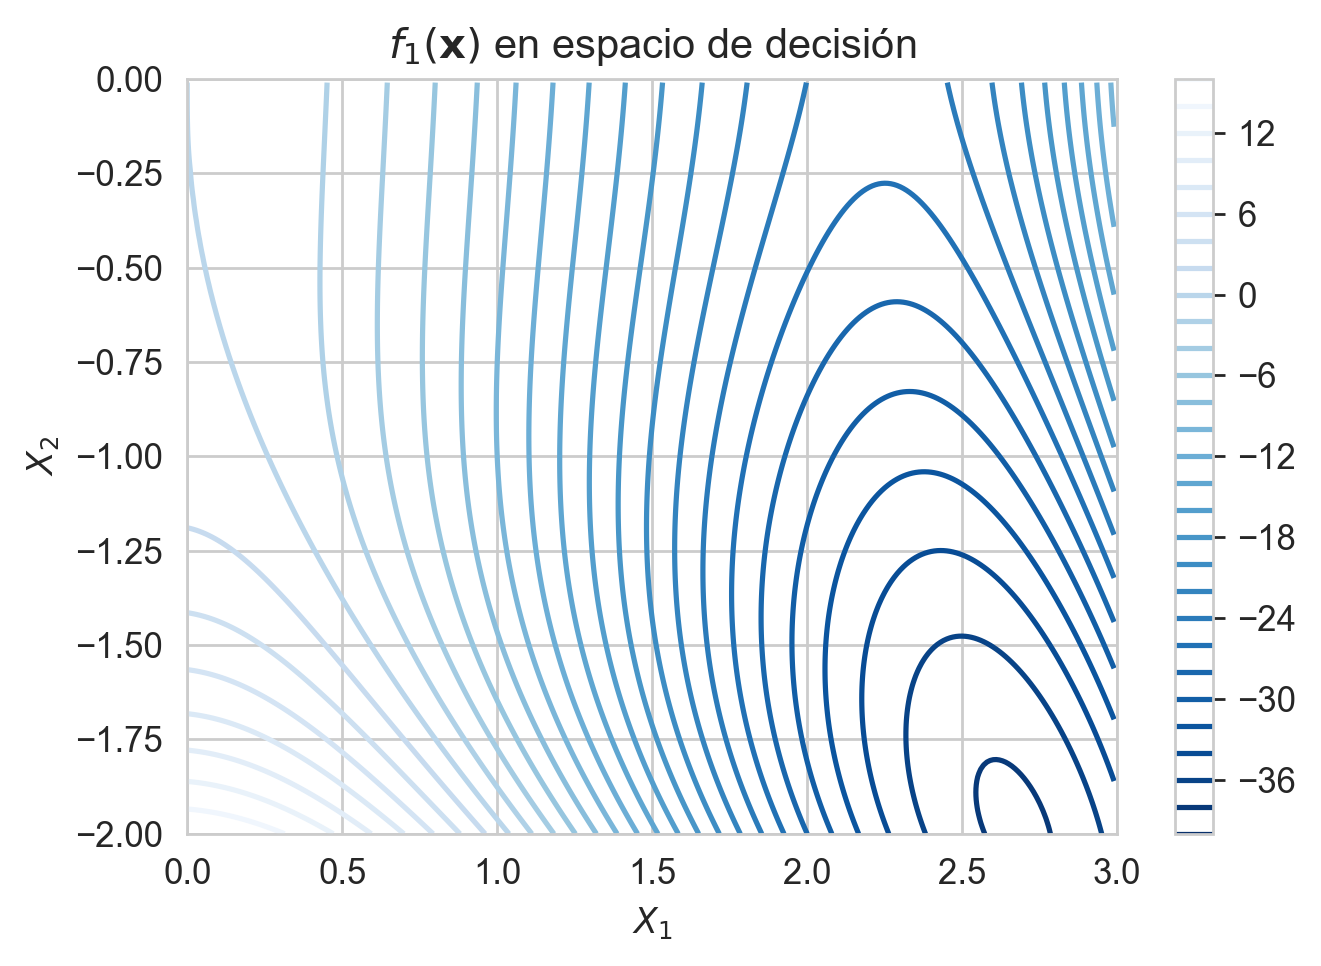

In [299]:
# Nos acercamos (zoom) al óptimo:
X1,X2 = np.meshgrid(np.arange(0,3,0.01), np.arange(-2,0,0.01))

plt.contour(X1,X2,f1([X1,X2]),30,cmap=plt.cm.Blues_r)
plt.colorbar()

plt.ylim([-2,0])
plt.xlim([0,3])
plt.title('$f_1(\mathbf{x})$ en espacio de decisión')
plt.ylabel('$X_2$')
plt.xlabel('$X_1$')

plt.show()

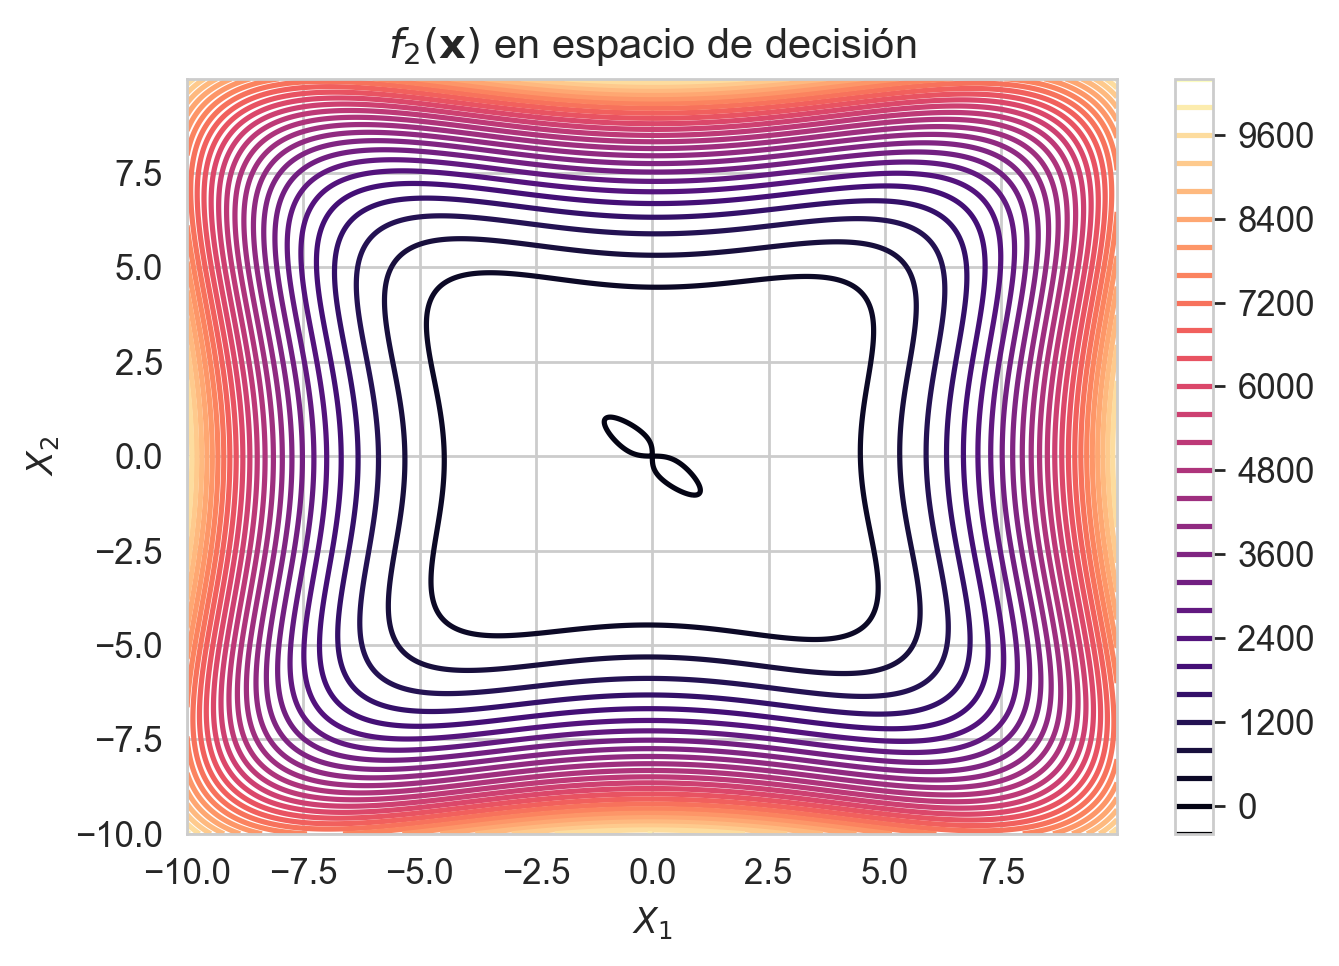

In [312]:
# Graficamos en rojo curvas de nivel de f2:
X1,X2 = np.meshgrid(np.arange(-10,10,0.01), np.arange(-10,10,0.01))

plt.contour(X1,X2,f2([X1,X2]),30,cmap=plt.cm.magma)

plt.title('$f_2(\mathbf{x})$ en espacio de decisión')
plt.ylabel('$X_2$')
plt.xlabel('$X_1$')
plt.colorbar()
plt.show()

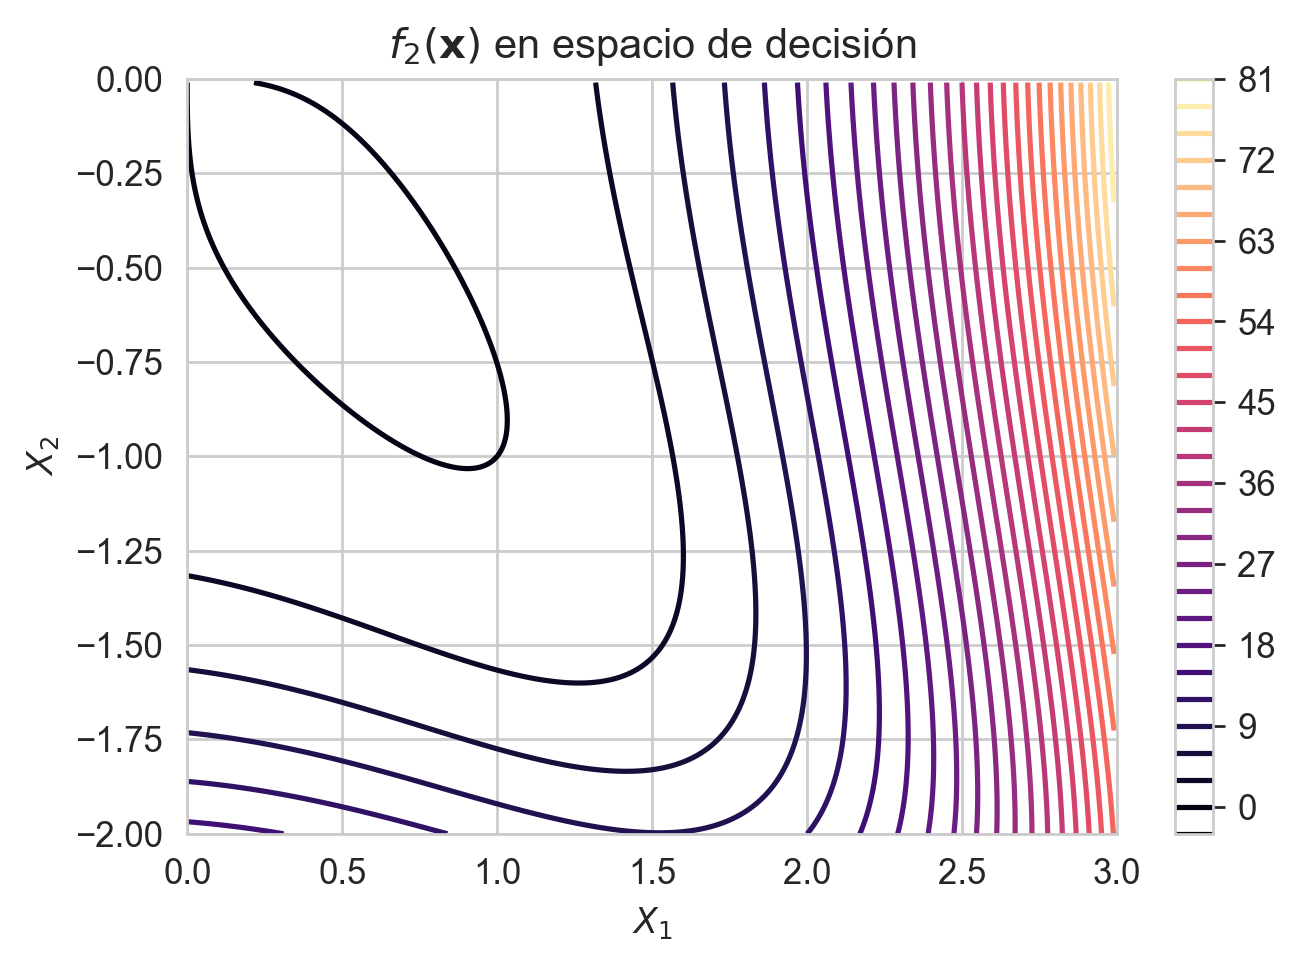

In [313]:
# Nos acercamos (zoom) al óptimo:
X1,X2 = np.meshgrid(np.arange(0,3,0.01), np.arange(-2,0,0.01))

plt.contour(X1,X2,f2([X1,X2]),30,cmap=plt.cm.magma)
plt.colorbar()

plt.ylim([-2,0])
plt.xlim([0,3])
plt.title('$f_2(\mathbf{x})$ en espacio de decisión')
plt.ylabel('$X_2$')
plt.xlabel('$X_1$')

plt.show()

## Espacio de Decisión

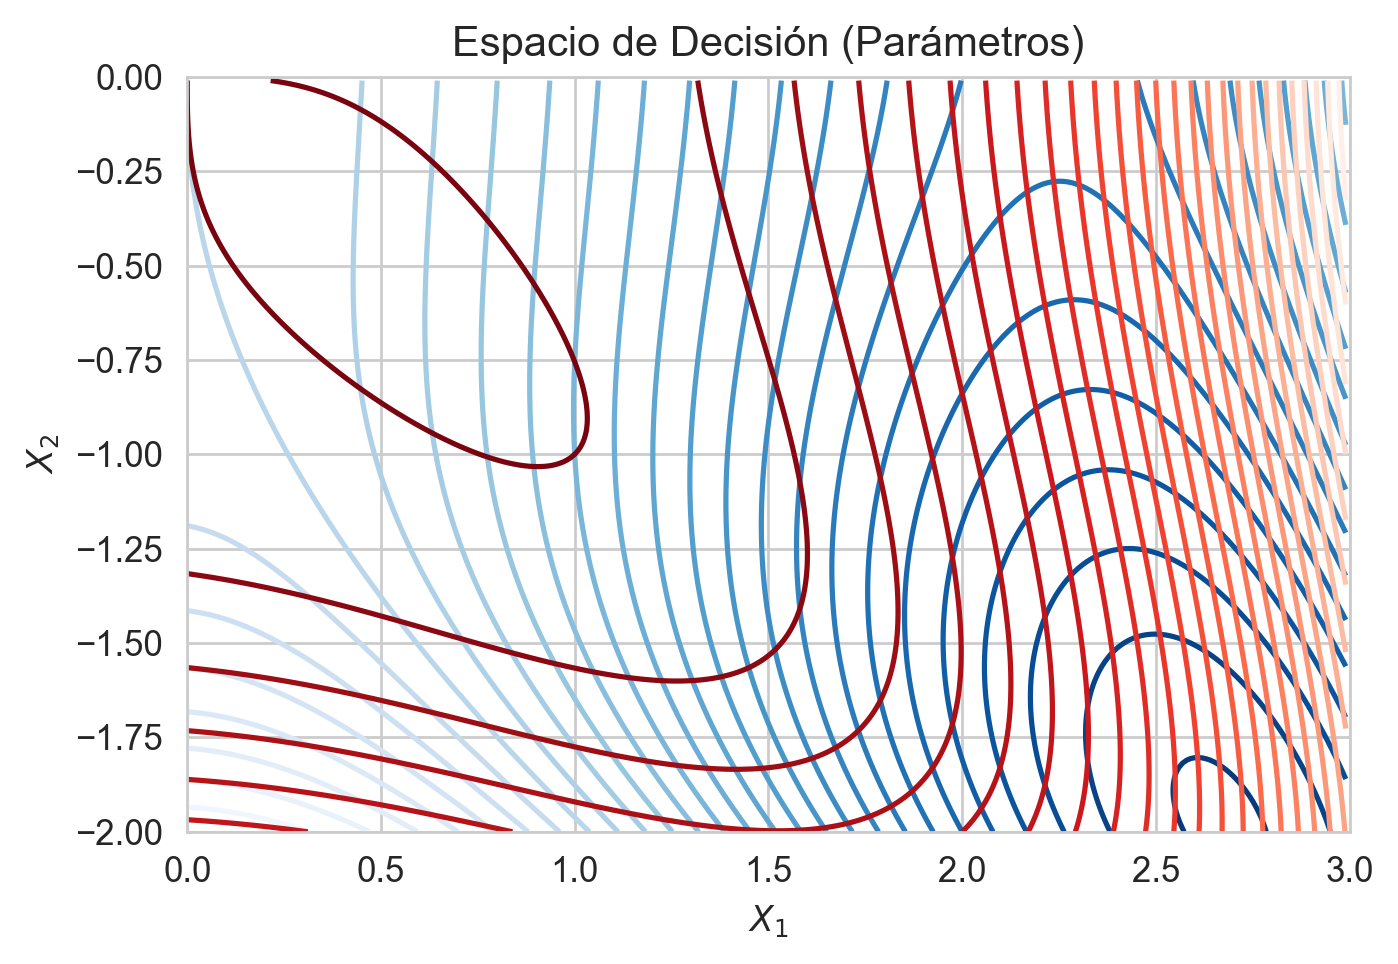

In [316]:
# Plot:
# En azul curvas de nivel de f1
# En rojo curvas de nivel de f2
X1,X2 = np.meshgrid(np.arange(0,3,0.01), np.arange(-2,0,0.01))

plt.contour(X1,X2,f1([X1,X2]),30,cmap=plt.cm.Blues_r)
plt.contour(X1,X2,f2([X1,X2]),30,cmap=plt.cm.Reds_r)

plt.ylim([-2,0])
plt.xlim([0,3])
plt.title('Espacio de Decisión (Parámetros)')
plt.ylabel('$X_2$')
plt.xlabel('$X_1$')
plt.show()

## Método de los Pesos

In [304]:
# Generamos dos listas para guardar las soluciones:
x_sol_list = []
f_sol_list = []

# Cambiamos los pesos:
dw = 0.1

for w in np.arange(0,1+dw,dw):
    
    # Redefinimos la función multi-objetivo usando los pesos:
    def objfun(x):
        return w*f1(x) + (1-w)*f2(x)
    
    # Usamos el optimizador de Scipy:
    sol = optimize.minimize(objfun, x0 = [1,-1])
    
    # Guardamos la solución:
    x_sol_list.append(sol.x)
    
    # Guardamos el valor de las funciones:
    f_sol_list.append([f1(sol.x), f2(sol.x)])

# Pasamos a numpy:
x_sol = np.array(x_sol_list)
f_sol = np.array(f_sol_list)

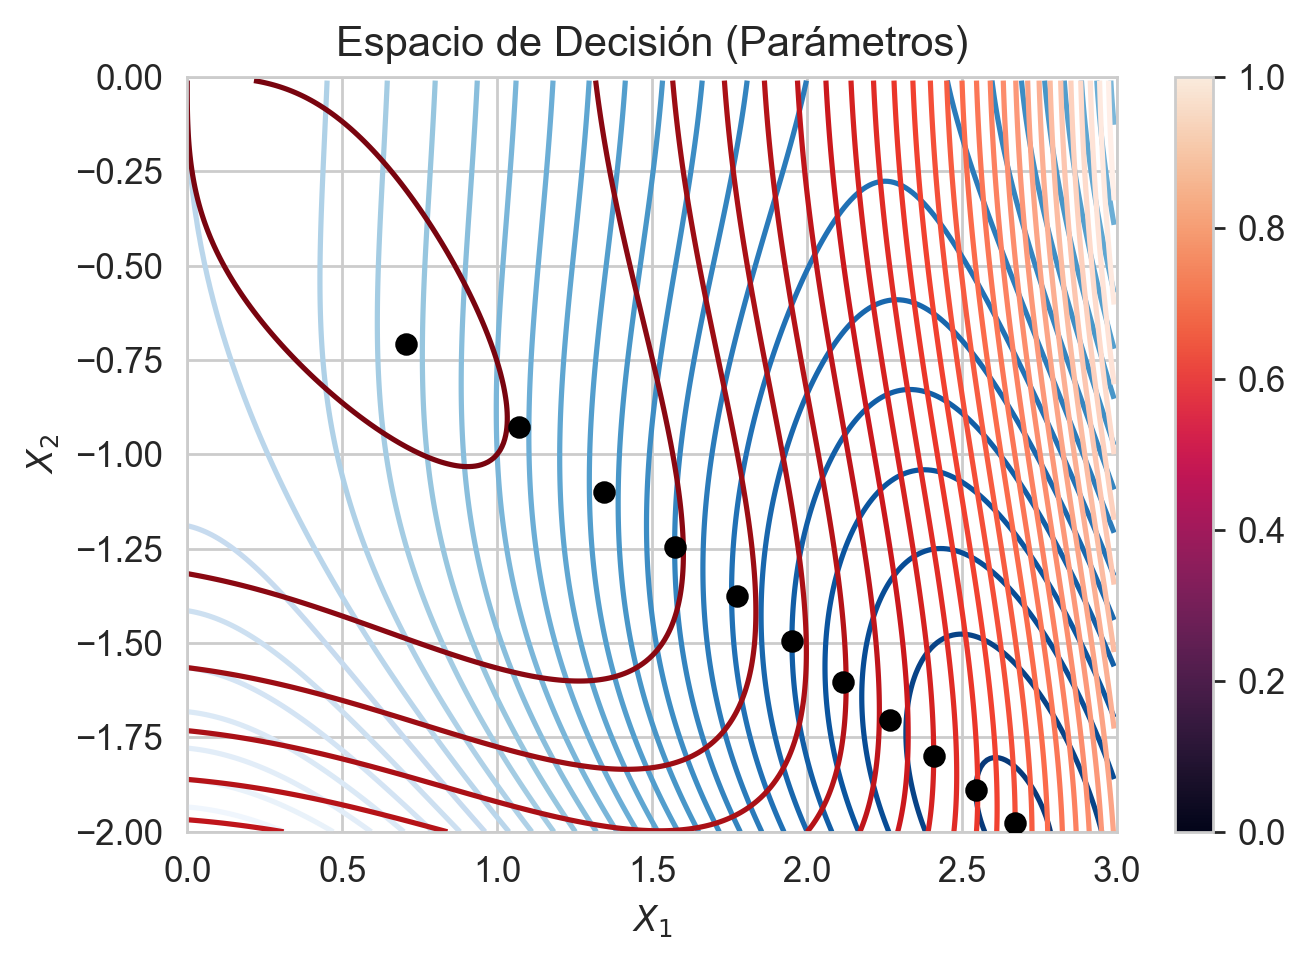

In [305]:
# Plot:
# En azul curvas de nivel de f1
# En rojo curvas de nivel de f2
X1,X2 = np.meshgrid(np.arange(0,3,0.01), np.arange(-2,0,0.01))

plt.contour(X1,X2,f1([X1,X2]),30,cmap=plt.cm.Blues_r)
plt.contour(X1,X2,f2([X1,X2]),30,cmap=plt.cm.Reds_r)
plt.scatter(x_sol[:,0], x_sol[:,1], zorder=5, color='k', s=30)

plt.ylim([-2,0])
plt.xlim([0,3])
plt.title('Espacio de Decisión (Parámetros)')
plt.ylabel('$X_2$')
plt.xlabel('$X_1$')
plt.colorbar()
plt.show()

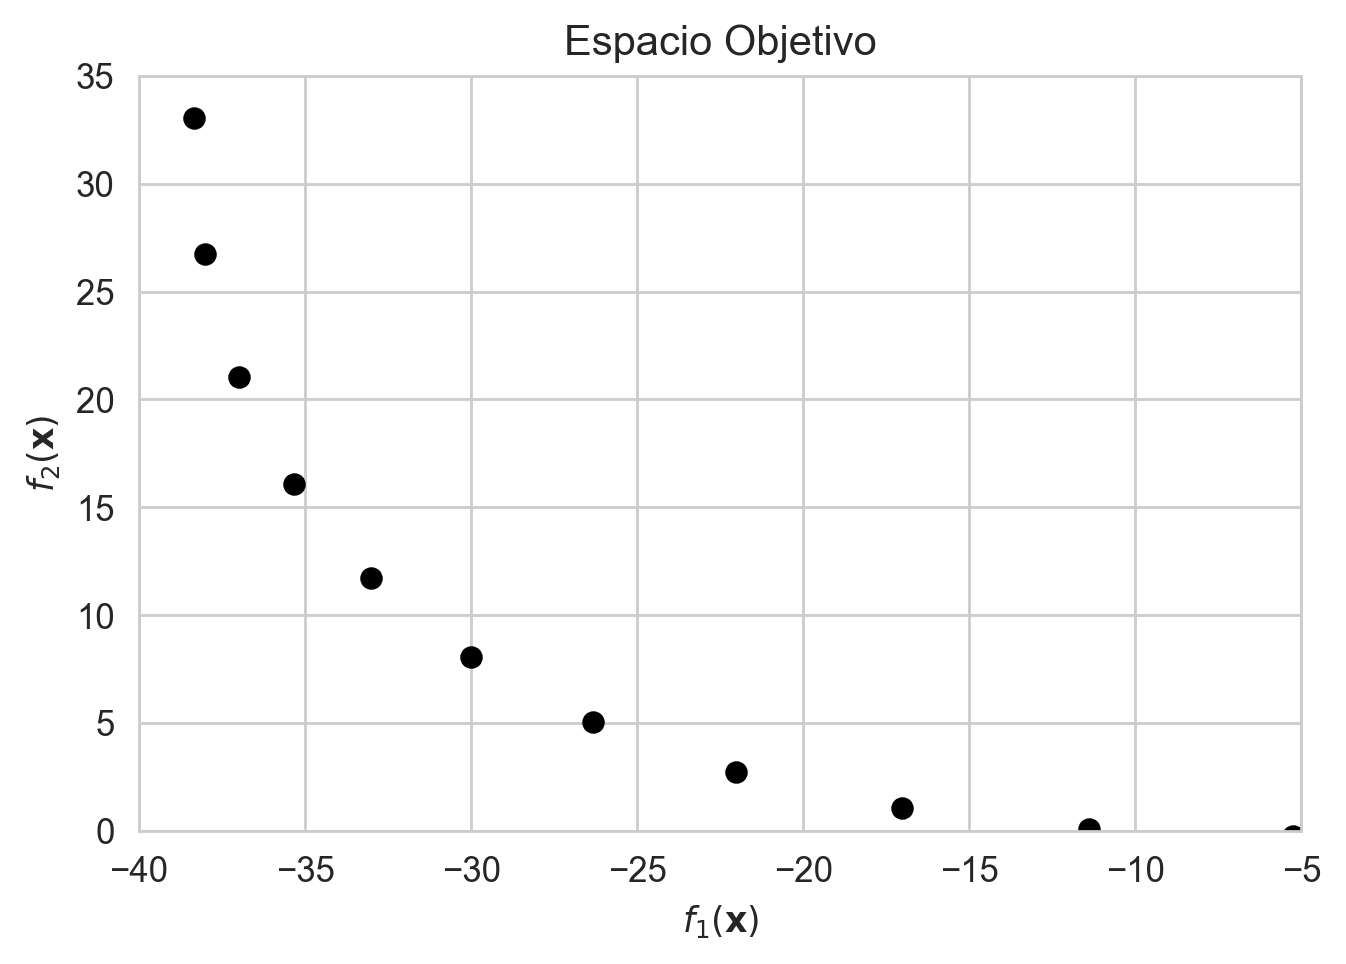

In [308]:
# Plot Frontera óptima:

plt.scatter(f_sol[:,0], f_sol[:,1], color='k', s=30)
plt.xlim([-40,-5])
plt.ylim([0,35])
plt.title('Espacio Objetivo')
plt.ylabel('$f_2(\mathbf{x})$')
plt.xlabel('$f_1(\mathbf{x})$')

plt.show()